In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# SET IMAGE SIZE 
IMG_SIZE = (128, 128)  

# LOAD DATASETS
train_dir = r'C:\ml-project\New Plant Diseases Dataset(Augmented)\train'
valid_dir = r'C:\ml-project\New Plant Diseases Dataset(Augmented)\valid'

# Initialize ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest' 
)

# INITIALIAZE IMAGEDATAGENERATOR
valid_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:

# LOAD DATA
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE, 
    batch_size=64,  
    class_mode='categorical'  
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)


Found 62952 images belonging to 34 classes.
Found 15736 images belonging to 34 classes.


In [ ]:
# DISPLAY CLASS LABELS
class_indices = train_data.class_indices

print("Class labels:")
for class_name in class_indices.keys():
    print(class_name)

# CNN MODEL
def build_cnn_model(input_shape=(128, 128, 3), num_classes=34):  
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax')) 

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# BUILD AND COMPILE MODEL
model = build_cnn_model()
model.summary()



Class labels:
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Soybean___healthy
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 34)             │        17,442 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,956,258 (49.42 MB)

 Trainable params: 12,956,258 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TRAIN MODELS
history = model.fit(
    train_data,
    epochs=3,  
    validation_data=valid_data
)
# EVALUATE MODEL ON VALIDATION DATA
loss, accuracy = model.evaluate(valid_data)
print(f'Validation Accuracy: {accuracy:.4f}')


Epoch 1/3
984/984 ━━━━━━━━━━━━━━━━━━━━ 1240s 1s/step - accuracy: 0.6025 - loss: 1.3058 - val_accuracy: 0.7414 - val_loss: 0.8423
Epoch 2/3
984/984 ━━━━━━━━━━━━━━━━━━━━ 1221s 1s/step - accuracy: 0.8263 - loss: 0.5350 - val_accuracy: 0.8100 - val_loss: 0.6135
Epoch 3/3
984/984 ━━━━━━━━━━━━━━━━━━━━ 1190s 1s/step - accuracy: 0.8770 - loss: 0.3751 - val_accuracy: 0.8428 - val_loss: 0.5381
492/492 ━━━━━━━━━━━━━━━━━━━━ 61s 124ms/step - accuracy: 0.8428 - loss: 0.5380
Validation Accuracy: 0.8428


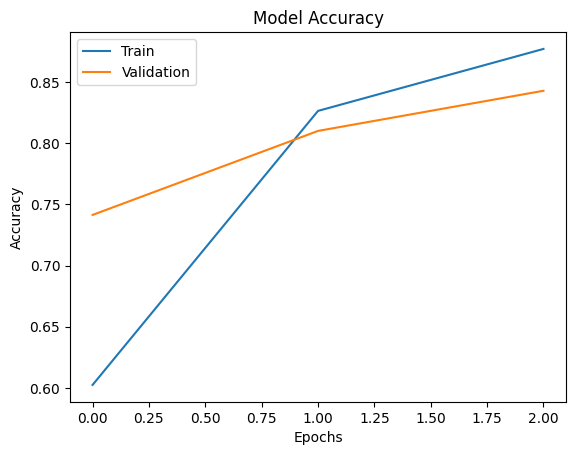

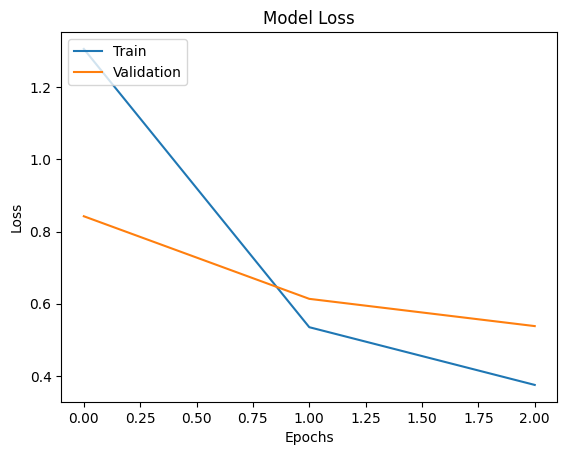

Model saved successfully!!


In [ ]:
import matplotlib.pyplot as plt

# PLOT TRAINING & VALIDATION ACCURACY VALUES
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# PLOT TRAINING & VALIDATION LOSS VALUES
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# SAVE MODEL

model.save('crop_disease_model.keras')
print("Model saved successfully!!")
